In [1]:
### model1 전처리 ###

In [83]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/a/Desktop/프로젝트/model1.csv'
data1 = pd.read_csv(file_path)

data1.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.130,0.234,0.305,0.186,...,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.118,0.255,0.290,0.151,...,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.232,0.264,0.346,0.248,...,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.143,0.243,0.314,0.103,...,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.116,0.271,0.325,0.091,...,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [67]:
# No missing data
missing_data = data1.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
isolated_power           0
xba                      0
woba                     0
xiso                     0
wobacon                  0
xwobacon                 0
xbacon                   0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
linedrives_percent       0
hp_to_1b                 0
sprint_speed             0
dtype: int64

In [68]:
# Getting rid of columns we don't need
data1 = data1.drop(columns=['last_name, first_name','player_id', 'year', 'pa'], errors='ignore')

In [69]:
columns_of_interest = ['k_percent', 'bb_percent', 'xba', 'woba', 'xiso', 'xbacon',
     'launch_angle_avg', 'sweet_spot_percent',  'hard_hit_percent', 
    'linedrives_percent', 'hp_to_1b', 'sprint_speed']

# Subsetting the data to these columns
selected_data = data1[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed
0,22.4,7.6,0.234,0.305,0.186,0.312,10.0,32.8,49.0,21.5,5.01,24.0
1,16.7,5.1,0.255,0.290,0.151,0.310,15.3,34.1,31.6,21.7,4.92,22.8
2,21.6,8.7,0.264,0.346,0.248,0.353,11.8,31.8,52.5,22.0,4.69,26.0
3,17.1,8.6,0.243,0.314,0.103,0.300,5.3,27.2,41.8,23.2,4.38,27.6
4,16.0,4.9,0.271,0.325,0.091,0.328,11.1,36.3,21.0,28.8,4.36,27.5


In [70]:
# Performing correlation analysis on the selected variables to see their relation with 'woba'
correlation_matrix = selected_data.corr()

# Extracting correlations of each feature with 'woba' for targeted insight
woba_correlations = correlation_matrix['woba'].sort_values(ascending=False)
woba_correlations

woba                  1.000000
xiso                  0.685940
xbacon                0.636695
xba                   0.609533
hard_hit_percent      0.535382
bb_percent            0.465344
sweet_spot_percent    0.333362
linedrives_percent    0.160668
launch_angle_avg      0.129969
sprint_speed         -0.007732
hp_to_1b             -0.008745
k_percent            -0.091422
Name: woba, dtype: float64

In [71]:
# Assuming `selected_data` is already extracted from the dataset
# Handling outliers by capping them at the 1st and 99th percentiles
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# Displaying summary statistics after outlier handling
selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_25912\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_25912\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_25912\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.249356,0.320854,0.165396,0.330535,13.031216,33.985249,39.963599,23.920583,4.467065,27.297496
std,5.716803,2.801871,0.024503,0.034659,0.053655,0.029617,4.521335,3.593069,7.224418,2.858725,0.194473,1.321672
min,10.017000,3.200000,0.191340,0.245000,0.066000,0.269170,2.800000,25.734000,21.634000,16.951000,4.110000,23.700000
25%,17.725000,6.400000,0.233000,0.298000,0.127250,0.310000,10.000000,31.500000,35.400000,21.825000,4.330000,26.400000
50%,21.600000,8.300000,0.249000,0.319500,0.161000,0.329000,13.150000,34.000000,40.150000,23.900000,4.430000,27.400000
75%,25.800000,10.300000,0.265000,0.343000,0.200000,0.350000,16.100000,36.375000,44.900000,25.900000,4.600000,28.300000
max,35.183000,15.900000,0.312830,0.419000,0.316660,0.411830,22.600000,42.900000,55.883000,30.900000,5.036600,30.100000


In [72]:
# Identify highly correlated factors and decide between MinMax and normalization.
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

Series([], dtype: float64)

In [73]:
scaling_method

'StandardScaler'

In [74]:
# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
standard_scaler.fit_transform(selected_data)

array([[ 0.0856379 , -0.31299002, -0.62699248, ..., -0.84711413,
         2.79306947, -2.4960599 ],
       [-0.91186912, -1.20565032,  0.2304455 , ..., -0.77712157,
         2.33007395, -2.72314678],
       [-0.05436308,  0.07978052,  0.59791892, ..., -0.67213272,
         1.14686318, -0.98214737],
       ...,
       [-0.40436555, -0.95570543,  0.4345974 , ..., -0.28717361,
        -1.37389019,  1.81859082],
       [-0.85936875, -1.27706314,  2.39445564, ...,  0.72771859,
        -1.11667046,  0.9102433 ],
       [-1.66437441, -0.74146696,  0.4345974 , ...,  0.79771115,
        -0.19067943, -0.90645174]])

In [77]:
# Multicollinearity Check
# Calculate the correlation matrix on the scaled data
correlation_matrix = selected_data.corr()

# Identify pairs of features with correlation > 0.8
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_pairs_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature 1,Feature 2,Correlation
0,sprint_speed,hp_to_1b,-0.886159


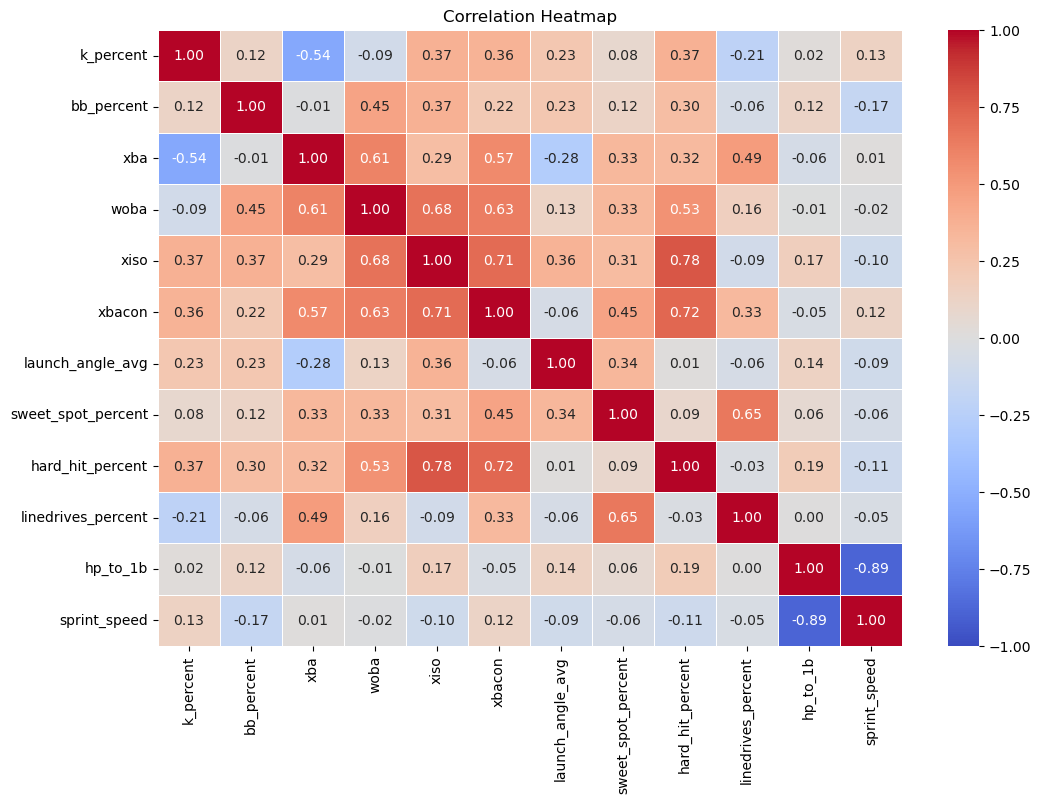

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_25912\1145931474.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['high_woba'] = (selected_data['woba'] > woba_median).astype(int)
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_mod

Cross-validation Accuracy Scores: [0.76785714 0.76785714 0.80357143 0.79372197 0.79372197]
Mean Accuracy: 0.785345932094811
Accuracy: 0.8035714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       107
           1       0.82      0.80      0.81       117

    accuracy                           0.80       224
   macro avg       0.80      0.80      0.80       224
weighted avg       0.80      0.80      0.80       224



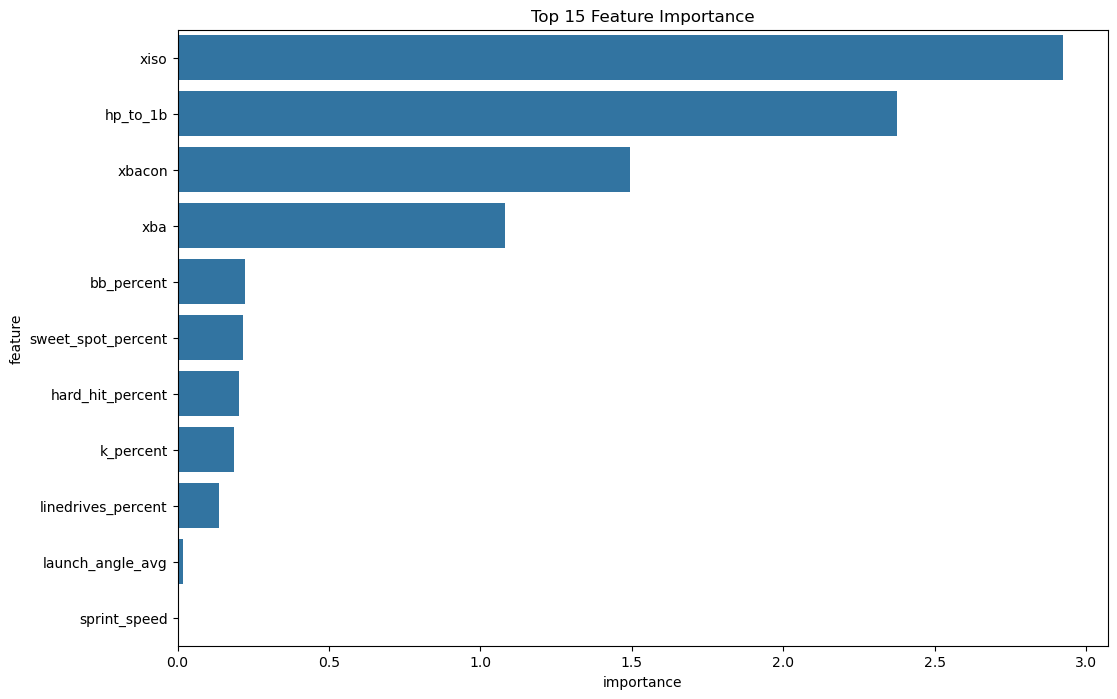

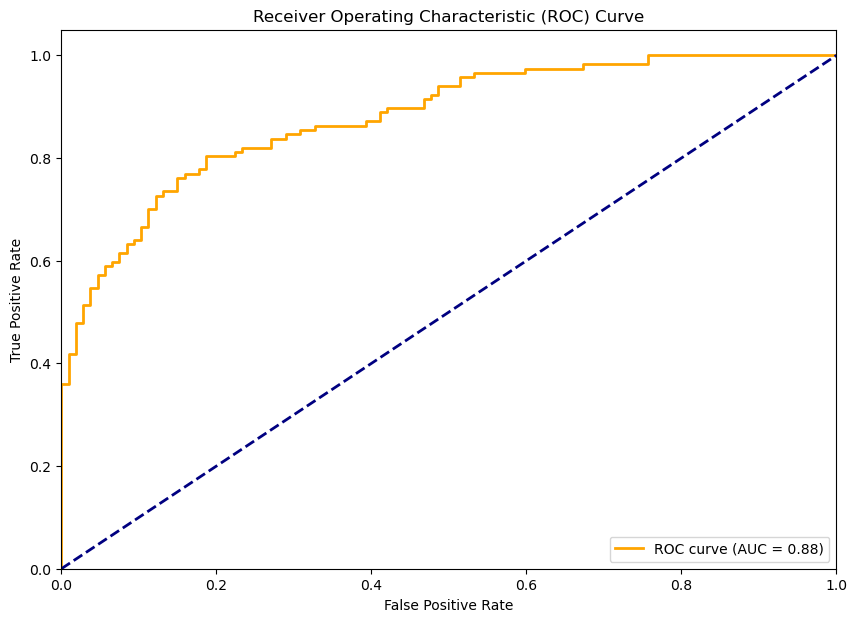

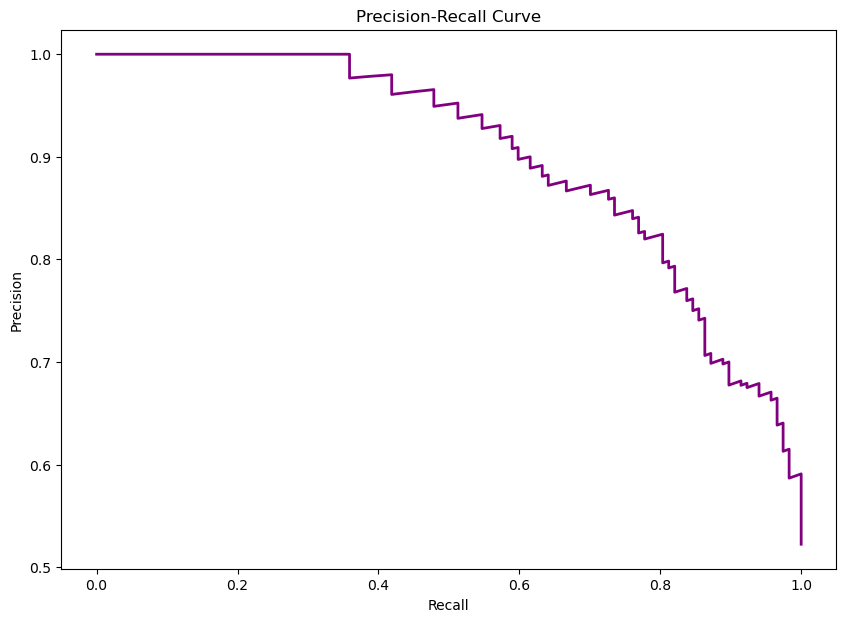

Test Set Performance Metrics:
Accuracy: 0.8036

Classification Report:
<function classification_report at 0x00000153E8353600>
ROC-AUC: 0.8797


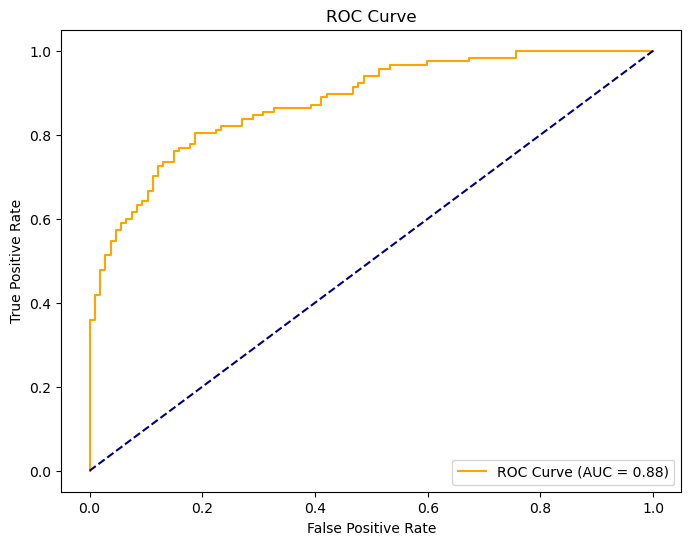

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve  

# 'woba'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
woba_median = selected_data['woba'].median()
selected_data['high_woba'] = (selected_data['woba'] > woba_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['woba', 'high_woba'], axis=1)
y = selected_data['high_woba']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculating ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Outputting the results
print("Test Set Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(15))

               feature  importance  importance_ratio
3                 xiso    2.923907         33.005507
9             hp_to_1b    2.376041         26.821112
4               xbacon    1.492272         16.844992
2                  xba    1.081438         12.207433
1           bb_percent    0.223158          2.519044
6   sweet_spot_percent    0.214639          2.422872
7     hard_hit_percent    0.201822          2.278202
0            k_percent    0.186847          2.109155
8   linedrives_percent    0.137690          1.554268
5     launch_angle_avg    0.019244          0.217232
10        sprint_speed    0.001788          0.020182
